In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3914,ham,Ard 530 lor. I ok then message Ì_ lor.,NaN,NaN,NaN
459,ham,Going thru a very different feeling.wavering d...,NaN,NaN,NaN
5402,ham,Hi babe its me thanks for coming even though i...,NaN,NaN,NaN
4456,ham,Aight should I just plan to come up later toni...,NaN,NaN,NaN
3026,ham,You still at the game?,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# **Step 1: Data Cleaning**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# dropping the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2416,ham,"Could you not read me, my Love ? I answered you"
2845,ham,Wat time u finish ur lect today?
5483,ham,So li hai... Me bored now da lecturer repeatin...
5112,spam,December only! Had your mobile 11mths+? You ar...
3090,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...


In [ ]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
411,ham,Cos i want it to be your thing
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no..."
3877,ham,What you need. You have a person to give na.
2224,ham,"I prefer my free days... Tues, wed, fri oso ca..."
3115,ham,Uncle Abbey! Happy New Year. Abiola


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()
#in this dataset, no duplicate values exist

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')
#keeping only the first instance of a value

In [ ]:
df.duplicated().sum()

0

# **Step 2: Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()
#individual count of each category ham and spam

,count
target,
0,4516
1,653


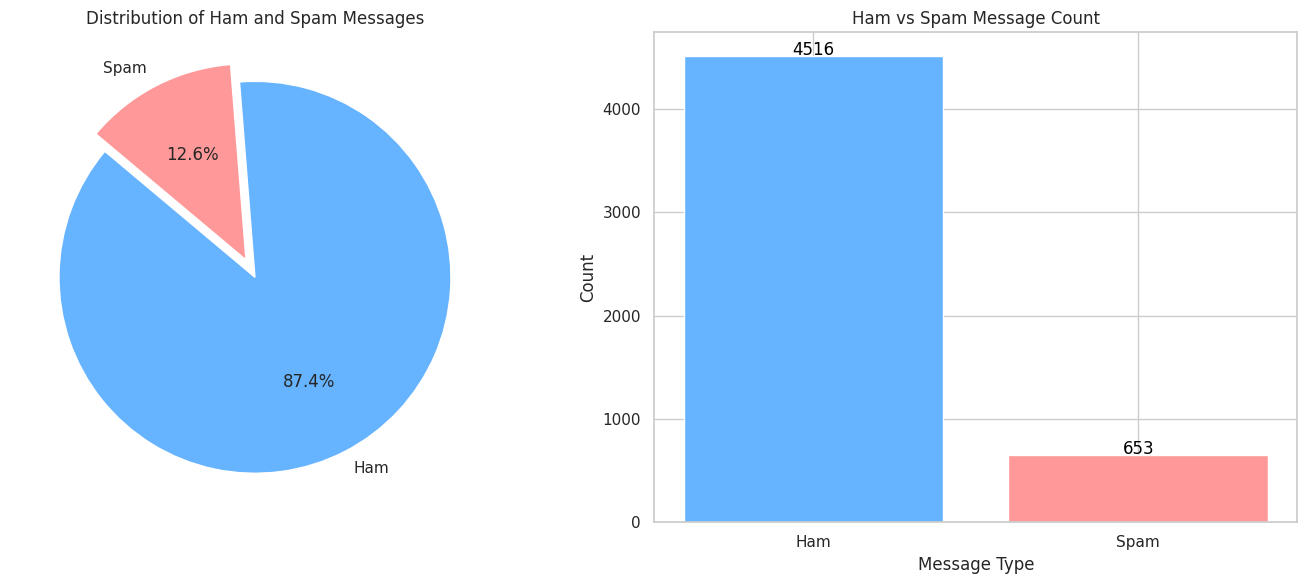

In [ ]:
import matplotlib.pyplot as plt

# Define colors for the pie chart
colors = ['#66b3ff', '#ff9999']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the pie chart on the first subplot
axes[0].pie(
    df['target'].value_counts(),
    labels=['Ham', 'Spam'],
    autopct="%0.1f%%",  # Display percentages with one decimal
    colors=colors,
    explode=[0, 0.1],  # Separate the Spam segment for emphasis
    startangle=140     # Rotate the chart to start at a specific angle
)
axes[0].set_title('Distribution of Ham and Spam Messages')

# Plot the stacked column chart on the second subplot
counts = df['target'].value_counts()

axes[1].bar(['Ham', 'Spam'], counts, color=colors)

# Add data labels on top of each bar
for i, v in enumerate(counts):
    axes[1].text(i, v + 5, str(v), ha='center', fontsize=12, color='black')

# Add title and labels to the stacked column chart
axes[1].set_title('Ham vs Spam Message Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Message Type')

# Display both charts side by side
plt.tight_layout()
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Fetching no of characters in each mail
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Fetching no of words in each mail
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#Fetching no of sentences in each mail
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#all
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

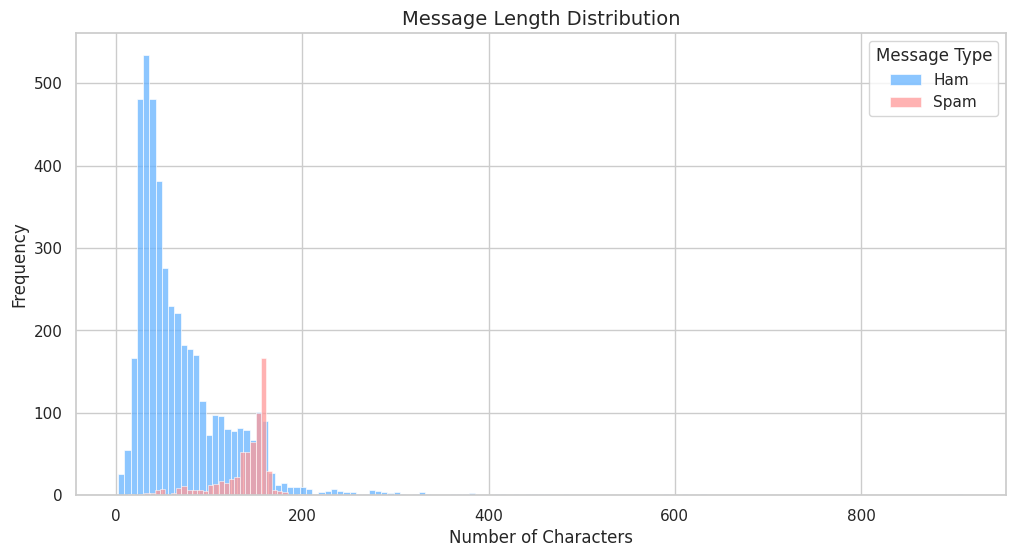

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram for 'Ham' messages
sns.histplot(
    df[df['target'] == 0]['num_characters'],
    color='#66b3ff',
    label='Ham'
)

# Plot histogram for 'Spam' messages
sns.histplot(
    df[df['target'] == 1]['num_characters'],
    color='#ff9999',
    label='Spam'
)

# Add a title and legend
plt.title('Message Length Distribution', fontsize=14)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend(title='Message Type')

# Display the plot
plt.show()

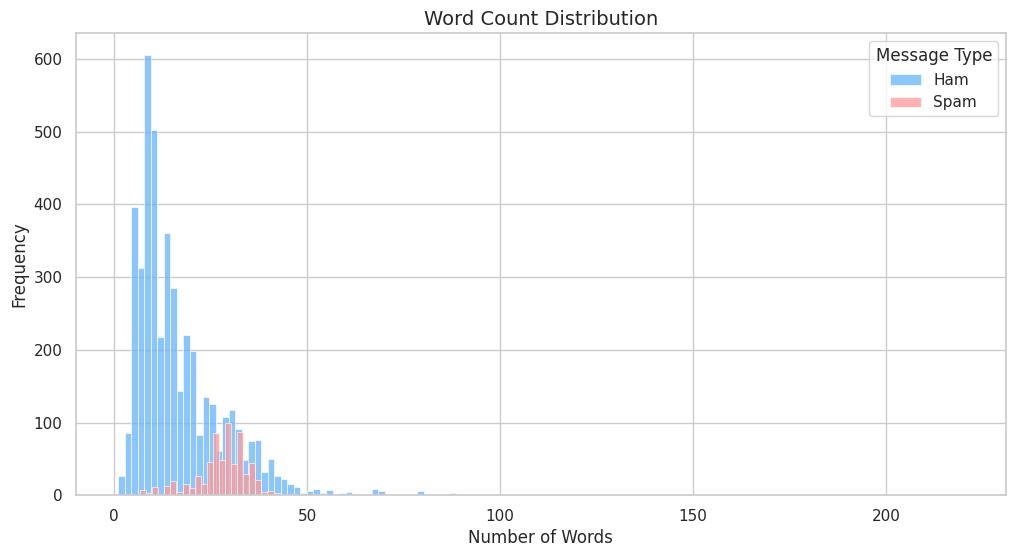

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram for 'Ham' messages
sns.histplot(
    df[df['target'] == 0]['num_words'],
    color='#66b3ff',
    label='Ham'
)

# Plot histogram for 'Spam' messages
sns.histplot(
    df[df['target'] == 1]['num_words'],
    color='#ff9999',
    label='Spam'
)

# Add a title and legend
plt.title('Word Count Distribution', fontsize=14)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(title='Message Type')

# Display the plot
plt.show()

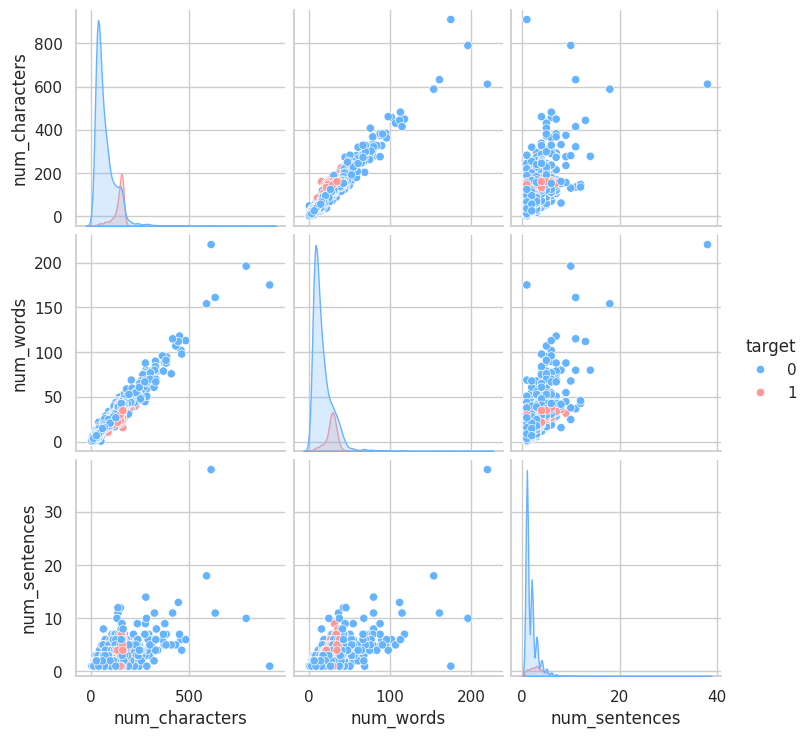

In [ ]:
# Define a custom color palette
custom_palette = {0: '#66b3ff', 1: '#ff9999'}

# Create a pairplot with the custom palette
sns.pairplot(df, hue='target', palette=custom_palette)

# Display the plot
plt.show()

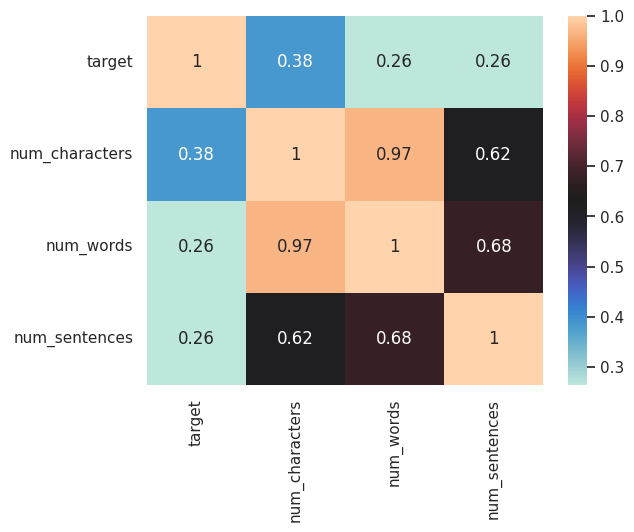

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
custom_palette = sns.color_palette("icefire", as_cmap=True)
sns.heatmap(numeric_df.corr(), annot=True, cmap=custom_palette)
plt.show()

# **Step 3: Data Preprocessing**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
#important words to detect spam mails
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

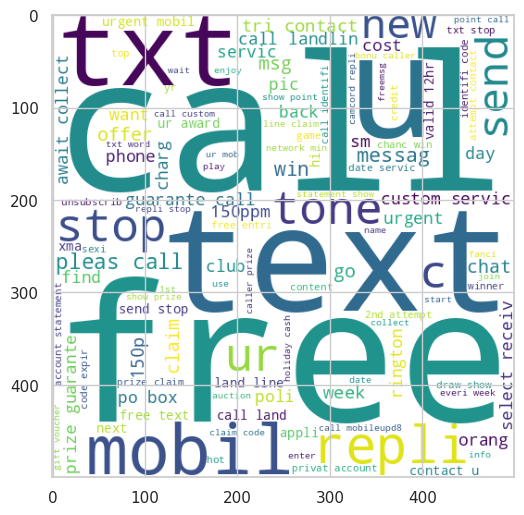

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
#important words to detect ham mails
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

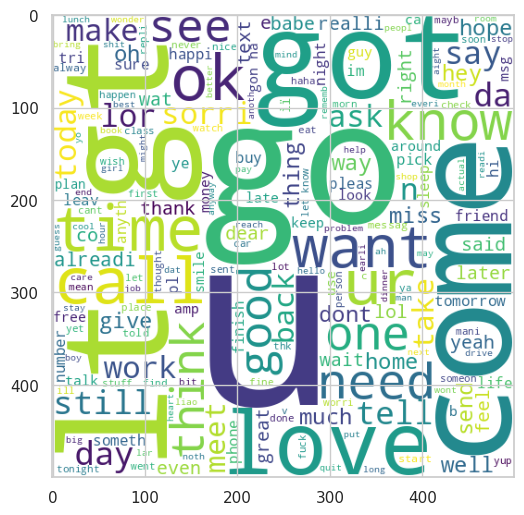

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from collections import Counter

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus) #total word count in spam

9939

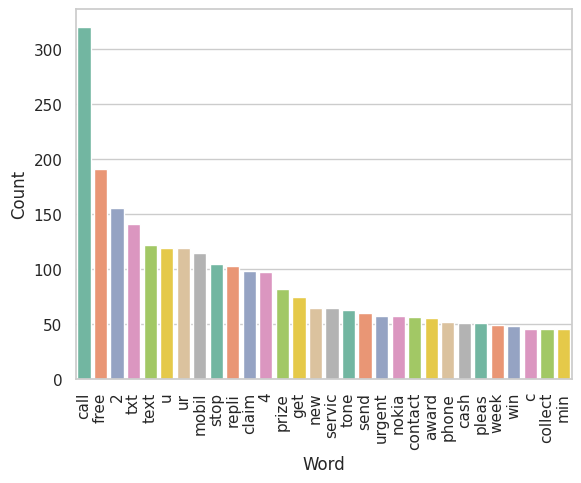

In [ ]:
# Example word counts
word_counts = Counter(spam_corpus)
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=["Word", "Count"])

# Define a color palette with a unique color for each bar
colors = sns.color_palette("Set2", n_colors=len(df_word_counts))

# Plot bar chart with custom colors for each category
sns.barplot(x="Word", y="Count", data=df_word_counts, palette=colors)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

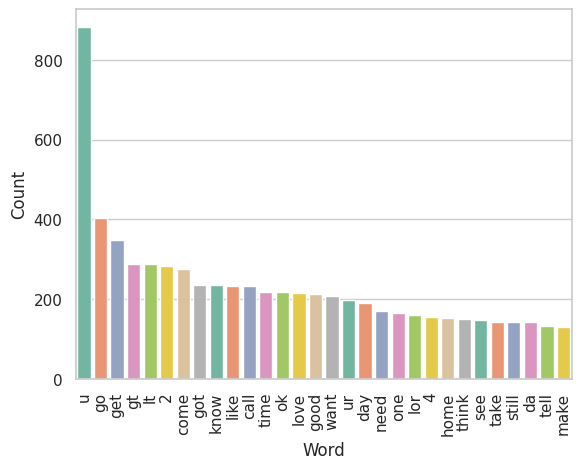

In [ ]:
# Example word counts for Ham corpus
word_counts = Counter(ham_corpus)
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=["Word", "Count"])

# Define a color palette with a unique color for each bar
colors = sns.color_palette("Set2", n_colors=len(df_word_counts))

# Plot bar chart with custom colors for each category
sns.barplot(x="Word", y="Count", data=df_word_counts, palette=colors)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **Step 4: Model Training and Testing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#converting the sparse array to a dense array
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape #(words)

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#20% test, 80% train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


### **#Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

mnb.fit(X_train, y_train)

mnb_pred_train = mnb.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, mnb_pred_train))
print("Training Precision:", precision_score(y_train, mnb_pred_train))

mnb_pred_test = mnb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, mnb_pred_test))
print("Test Precision:", precision_score(y_test, mnb_pred_test))

Training Accuracy: 0.9789600967351875
Training Precision: 0.9953703703703703
Test Accuracy: 0.9709864603481625
Test Precision: 1.0


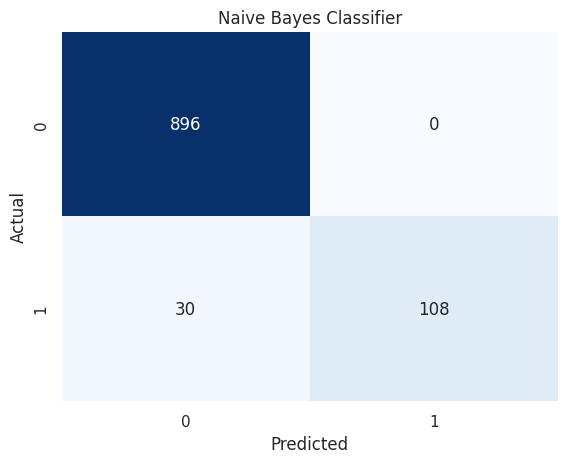

In [ ]:
cm = confusion_matrix(y_test, mnb_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Classifier')

plt.show()

### **#SVM(Support Vector Machine) Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

svc.fit(X_train, y_train)

svc_pred_train = svc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, svc_pred_train))
print("Training Precision:", precision_score(y_train, svc_pred_train))

svc_pred_test = svc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, svc_pred_test))
print("Test Precision:", precision_score(y_test, svc_pred_test))

Training Accuracy: 0.985006045949214
Training Precision: 0.9808917197452229
Test Accuracy: 0.9758220502901354
Test Precision: 0.9747899159663865


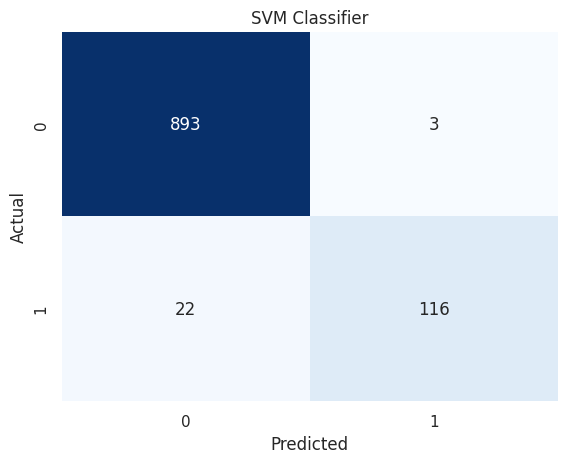

In [ ]:
cm = confusion_matrix(y_test, svc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Classifier')

plt.show()

### **#Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

dtc.fit(X_train, y_train)

dtc_pred_train = dtc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, dtc_pred_train))
print("Training Precision:", precision_score(y_train, dtc_pred_train))

dtc_pred_test = dtc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, dtc_pred_test))
print("Test Precision:", precision_score(y_test, dtc_pred_test))

Training Accuracy: 0.9496977025392986
Training Precision: 0.9071618037135278
Test Accuracy: 0.9274661508704062
Test Precision: 0.8118811881188119


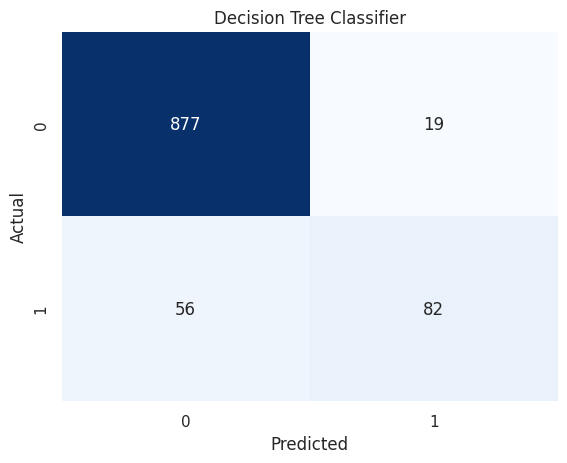

In [ ]:
cm = confusion_matrix(y_test, dtc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier')

plt.show()

### **#KNN(K-Nearest Neighbor) Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

knc.fit(X_train, y_train)

knc_pred_train = knc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, knc_pred_train))
print("Training Precision:", precision_score(y_train, knc_pred_train))

knc_pred_test = knc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, knc_pred_test))
print("Test Precision:", precision_score(y_test, knc_pred_test))

Training Accuracy: 0.9257557436517533
Training Precision: 1.0
Test Accuracy: 0.9052224371373307
Test Precision: 1.0


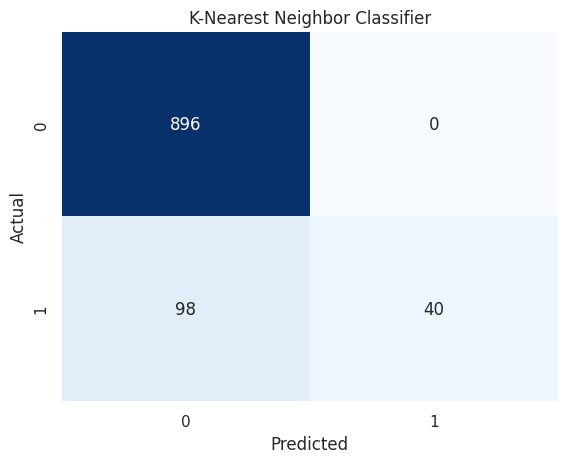

In [ ]:
cm = confusion_matrix(y_test, knc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbor Classifier')

plt.show()

### **#RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, rfc_pred_train))
print("Training Precision:", precision_score(y_train, rfc_pred_train))

rfc_pred_test = rfc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, rfc_pred_test))
print("Test Precision:", precision_score(y_test, rfc_pred_test))

Training Accuracy: 0.999758162031439
Training Precision: 1.0
Test Accuracy: 0.9758220502901354
Test Precision: 0.9829059829059829


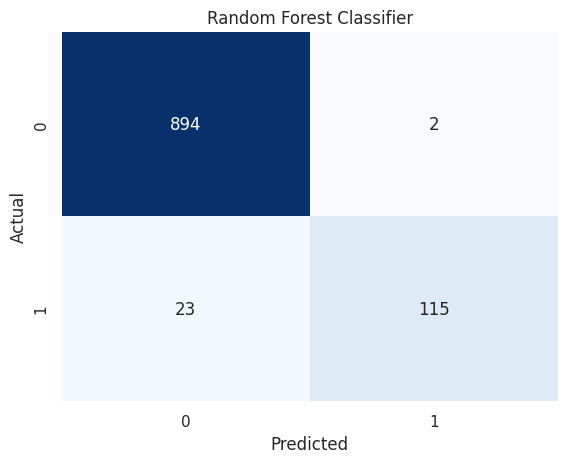

In [ ]:
cm = confusion_matrix(y_test, rfc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier')

plt.show()

### **#Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

gbdt.fit(X_train, y_train)

gbdt_pred_train = gbdt.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, gbdt_pred_train))
print("Training Precision:", precision_score(y_train, gbdt_pred_train))

gbdt_pred_test = gbdt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, gbdt_pred_test))
print("Test Precision:", precision_score(y_test, gbdt_pred_test))

Training Accuracy: 0.9671100362756953
Training Precision: 0.9922077922077922
Test Accuracy: 0.9468085106382979
Test Precision: 0.9191919191919192


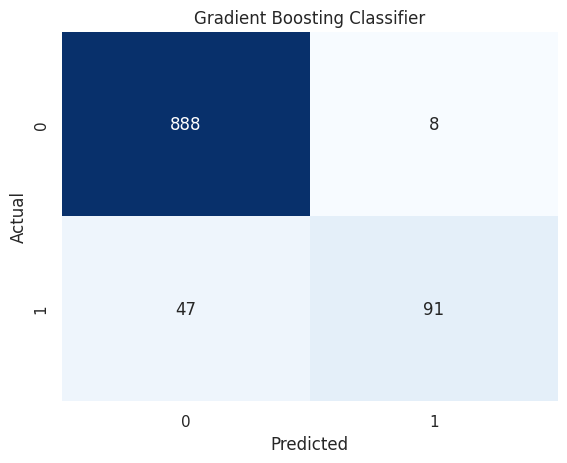

In [ ]:
cm = confusion_matrix(y_test, gbdt_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier')

plt.show()

# **Comparative Analysis**

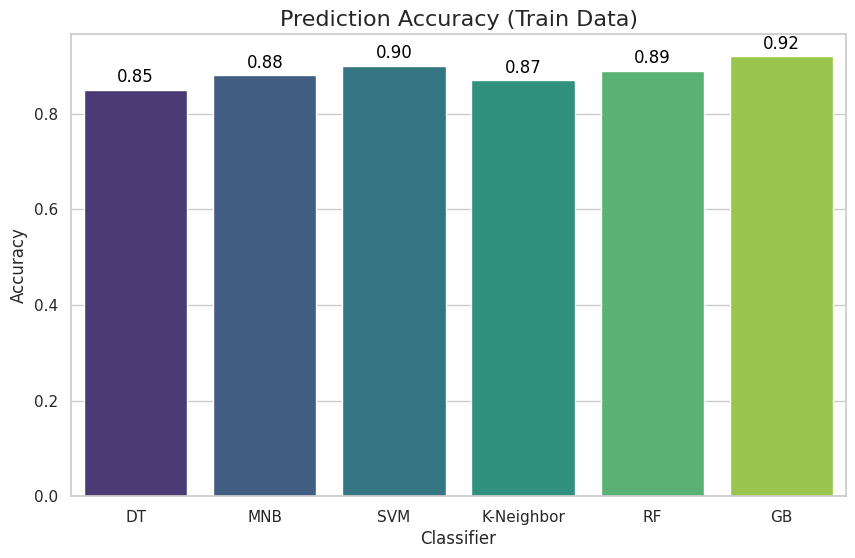

In [ ]:
# Define accuracy values (assumed values for the example)
dtc_accuracy = 0.85
mnb_accuracy = 0.88
svc_accuracy = 0.90
knc_accuracy = 0.87
rfc_accuracy = 0.89
gbdt_accuracy = 0.92

# Create a DataFrame with classifiers and accuracy values
data = pd.DataFrame({
    'Classifier': ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB'],
    'Accuracy': [dtc_accuracy, mnb_accuracy, svc_accuracy, knc_accuracy, rfc_accuracy, gbdt_accuracy]
})

# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Create the barplot with custom colors
bar_plot = sns.barplot(x='Classifier', y='Accuracy', data=data, palette="viridis")

# Add title and labels
plt.title("Prediction Accuracy (Train Data)", fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the accuracy values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()

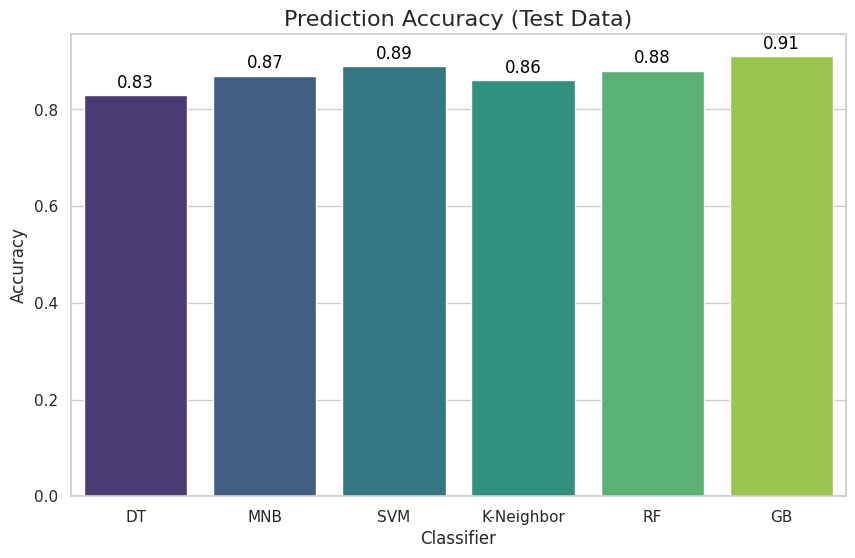

In [ ]:
# Define accuracy values (assumed values for the example)
dtc_accuracy_test = 0.83
mnb_accuracy_test = 0.87
svc_accuracy_test = 0.89
knc_accuracy_test = 0.86
rfc_accuracy_test = 0.88
gbdt_accuracy_test = 0.91

# Create a DataFrame with classifiers and accuracy values
data_test = pd.DataFrame({
    'Classifier': ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB'],
    'Accuracy': [dtc_accuracy_test, mnb_accuracy_test, svc_accuracy_test,
                 knc_accuracy_test, rfc_accuracy_test, gbdt_accuracy_test]
})

# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Create the barplot with custom colors
bar_plot = sns.barplot(x='Classifier', y='Accuracy', data=data_test, palette="viridis")

# Add title and labels
plt.title("Prediction Accuracy (Test Data)", fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the accuracy values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()

### **#Precision & Recall Score Analysis**

In [ ]:
import sklearn.metrics as mt

In [ ]:
model_train_data = [mnb_pred_train,svc_pred_train,dtc_pred_train,knc_pred_train,rfc_pred_train,gbdt_pred_train]
model_test_data = [mnb_pred_test,svc_pred_test,dtc_pred_test,knc_pred_test,rfc_pred_test,gbdt_pred_test]

In [ ]:
#Train
model_train_precision_scores = []
model_train_recall_scores = []

for model_data in model_train_data:
    model_train_precision_scores.append(mt.precision_score(model_data,y_train))
    model_train_recall_scores.append(mt.recall_score(model_data,y_train))

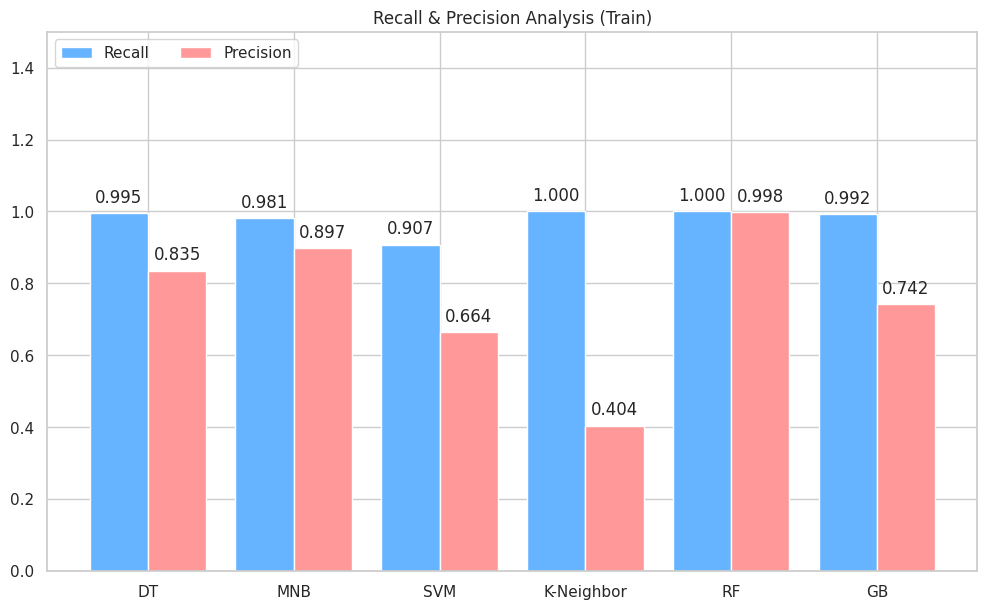

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Labels and data for the chart
labels = ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB']
data = {
    'Recall': model_train_recall_scores,
    'Precision': model_train_precision_scores,
}

x = np.arange(len(labels))
width = 0.4
multiplier = 0

# Create figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors to match pie chart
colors = ['#66b3ff', '#ff9999']

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    ax.bar_label(rects, fmt='%.3f', label_type="edge", padding=5)
    multiplier += 1

# Set titles and labels
ax.set_title('Recall & Precision Analysis (Train)')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', ncols=6)
ax.set_ylim(0, 1.5)

# Display the chart
plt.show()

In [ ]:
#Test
model_test_precision_scores = []
model_test_recall_scores = []

for model_data in model_test_data:
    model_test_precision_scores.append(mt.precision_score(model_data,y_test))
    model_test_recall_scores.append(mt.recall_score(model_data,y_test))

In [ ]:
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
}
#print(data)

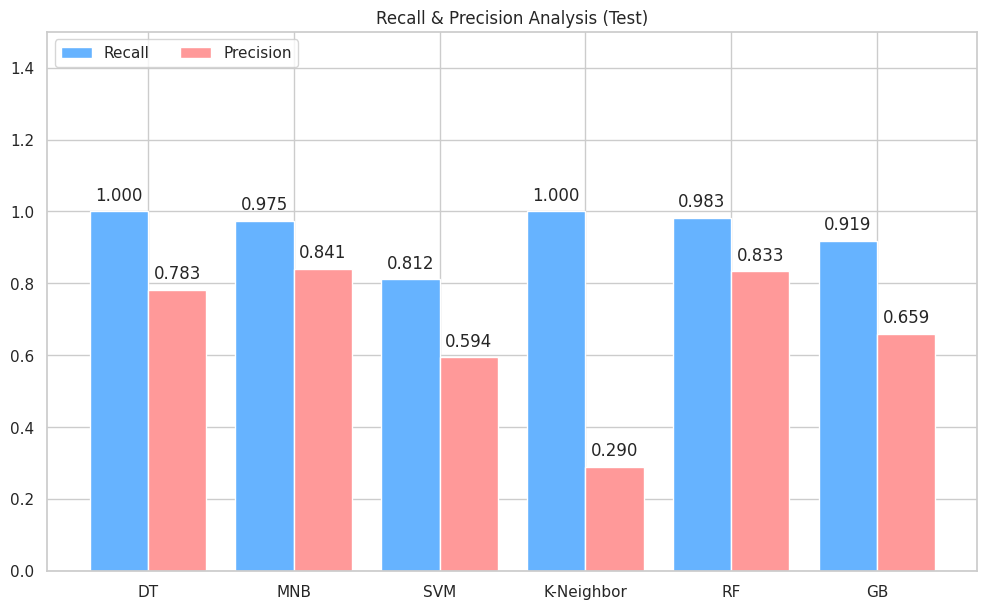

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Labels and data for the chart
labels = ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB']
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
}

x = np.arange(len(labels))
width = 0.4
multiplier = 0

# Create figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors to match pie chart
colors = ['#66b3ff', '#ff9999']

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    ax.bar_label(rects, fmt='%.3f', label_type="edge", padding=5)
    multiplier += 1

# Set titles and labels
ax.set_title('Recall & Precision Analysis (Test)')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

# Display the chart
plt.show()